In [1]:
#load packages
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import soundfile as sf


In [2]:
#import data 
path = 'x:/Steering/Recordings/Processed/'
data, fs = sf.read(path + 'ERB=2.wav')
classes = pd.read_csv(path + 'Classes_2.csv')


In [3]:
X = data[:len(data)-1,:data.shape[1]] #775361
Y = classes.values[:,0] - 1

In [4]:
Y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [5]:
timeSteps = 60;
features = X.shape[1];
#reshape the taining set to (samples, timeSteps, features)
tmp = X[:int(len(X)/timeSteps)*timeSteps]
X = tmp.reshape(int(len(tmp)/timeSteps),timeSteps,features)

tmp = Y[:int(len(Y)/timeSteps)*timeSteps]
Y = tmp.reshape(int(len(tmp)/timeSteps),timeSteps,1)

In [6]:
#split into training and test set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
trainY.shape

(14133, 60, 1)

In [8]:
trainY_OHC = keras.utils.to_categorical(trainY)
testY_OHC = keras.utils.to_categorical(testY)

In [9]:
trainY_OHC.shape

(14133, 60, 5)

In [10]:
#DC removal 
trainX -= (np.mean(trainX, axis=0) + 1e-8)
testX -= (np.mean(testX, axis=0) + 1e-8)

In [11]:
print(trainX.shape, trainY_OHC.shape) 

(14133, 60, 108) (14133, 60, 5)


In [12]:
trainY_OHC.shape, trainX.shape

((14133, 60, 5), (14133, 60, 108))

In [31]:
model = keras.Sequential()

In [32]:
#design the net
model.add(keras.layers.GRU(56,input_shape = (timeSteps, features),activation='tanh',
                            return_sequences=True))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(5,activation='softmax',
                                                          kernel_regularizer=keras.regularizers.l2(0.001))))


In [33]:
#compiling
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [34]:
#fit model
history = model.fit(trainX,trainY_OHC, epochs = 50, batch_size=50,validation_split=0.2)

Train on 11306 samples, validate on 2827 samples
Epoch 1/50
11306/11306 [==============================] - 11s 942us/step - loss: 0.1572 - acc: 0.3427 - val_loss: 0.1529 - val_acc: 0.3576
Epoch 2/50
11306/11306 [==============================] - 10s 848us/step - loss: 0.1526 - acc: 0.3443 - val_loss: 0.1494 - val_acc: 0.3648
Epoch 3/50
11306/11306 [==============================] - 10s 852us/step - loss: 0.1320 - acc: 0.4406 - val_loss: 0.1248 - val_acc: 0.4837
Epoch 4/50
11306/11306 [==============================] - 10s 860us/step - loss: 0.1172 - acc: 0.5504 - val_loss: 0.1127 - val_acc: 0.5697
Epoch 5/50
11306/11306 [==============================] - 10s 845us/step - loss: 0.1049 - acc: 0.6180 - val_loss: 0.1040 - val_acc: 0.6228
Epoch 6/50
11306/11306 [==============================] - 10s 851us/step - loss: 0.0975 - acc: 0.6481 - val_loss: 0.0966 - val_acc: 0.6435
Epoch 7/50
11306/11306 [==============================] - 10s 847us/step - loss: 0.0914 - acc: 0.6711 - val_loss: 0.0

In [35]:
model.evaluate(testX,testY_OHC,verbose=1)

3534/3534 [==============================] - 1s 323us/step


[0.0556800492786727, 0.821354462591753]

In [36]:
# save model and weights
model_json = model.to_json()
with open("GRU_56-60-5.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("GRU_56-60-5.h5")

In [37]:
np.save('TestX_GRU_56-60-5',testX), np.save('TestY_GRU_56-60-5',testY),
np.save('OneHot_GRU_56-60-5',testY_OHC)

In [38]:
import matplotlib.pyplot as plt

In [43]:
history.history

{'val_loss': [0.15285083605157726,
  0.1494131933253352,
  0.12482659901394455,
  0.11272078588325564,
  0.10401336430217169,
  0.09657130852673726,
  0.08952048722408161,
  0.0872020337073087,
  0.0876023923740355,
  0.08520975947474944,
  0.08497841450374878,
  0.0872438254502286,
  0.07810585750817071,
  0.07730128166740506,
  0.07392233663917558,
  0.07190898260833688,
  0.071862984755708,
  0.07531572504250414,
  0.06969640566992136,
  0.06772108022999881,
  0.06777081754800494,
  0.06550664631014036,
  0.06503707126209919,
  0.06461524643164707,
  0.06443773307957791,
  0.06857545808389873,
  0.07108280780851356,
  0.06525806079051669,
  0.06490086635352657,
  0.06265588299488911,
  0.06220484001553434,
  0.0614031992225437,
  0.06052539451097194,
  0.06098558035948313,
  0.059377839732789976,
  0.059561866606698675,
  0.06691431185757056,
  0.060344855702667635,
  0.05873748310092147,
  0.05830091722428187,
  0.056607461580232464,
  0.05840585266543354,
  0.05683074456313114,
  

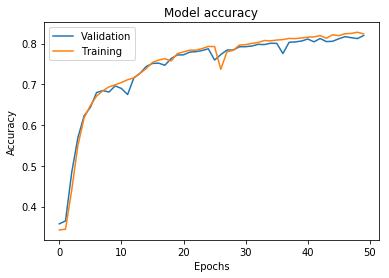

In [45]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Validation', 'Training'], loc='upper left')
plt.savefig('Accuracy_GRU.png',dpi=150)